In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
r1d_1 = pd.read_csv("data/trades_round_1_day_-1_wn.csv", sep=";")
r1d_2 = pd.read_csv("data/trades_round_1_day_-2_wn.csv", sep=";")
r1d0 = pd.read_csv("data/trades_round_1_day_0_wn.csv", sep=";")

r2d_1 = pd.read_csv("data/trades_round_2_day_-1_wn.csv", sep=";")
r2d0 = pd.read_csv("data/trades_round_2_day_0_wn.csv", sep=";")
r2d1 = pd.read_csv("data/trades_round_2_day_1_wn.csv", sep=";")

r3d2 = pd.read_csv("data/trades_round_3_day_2_wn.csv", sep=";")
r3d0 = pd.read_csv("data/trades_round_3_day_0_wn.csv", sep=";")
r3d1 = pd.read_csv("data/trades_round_3_day_1_wn.csv", sep=";")

r4d2 = pd.read_csv("data/trades_round_4_day_2_wn.csv", sep=";")
r4d3 = pd.read_csv("data/trades_round_4_day_3_wn.csv", sep=";")
r4d1 = pd.read_csv("data/trades_round_4_day_1_wn.csv", sep=";")

In [3]:
data_ls = [r1d_1, r1d_2, r1d0, r2d_1, r2d0, r2d1, r3d2, r3d0, r3d1, r4d2, r4d3, r4d1]

In [4]:
def track_position(data, product, trader):
    if product not in data["symbol"].unique():
        print("No relevant transactions")
        return
    temp = data.loc[(data["symbol"] == product),
                    ["timestamp", "buyer", "seller", "quantity"]]
    trader_buyer = temp[temp['buyer'] == trader]

    # filter rows where Charlie appears as a seller
    trader_seller = temp[temp['seller'] == trader]

    # concatenate the two filtered dataframes
    trader_data = pd.concat([trader_buyer, trader_seller])

    # sort the data by time
    trader_data = trader_data.sort_values('timestamp')

    def get_inv(row):
        if row["buyer"] == trader:
            return row["quantity"]
        else:
            return -row["quantity"]

    trader_data["position"] = trader_data.apply(get_inv, axis=1)
    trader_data["position"] = trader_data["position"].cumsum(axis=0)
    print("max position: %d", max(trader_data["position"]))
    print("min position: %d", min(trader_data["position"]))
    title = trader + " position in " + product
    trader_data["position"].plot(title=title, figsize=(10, 5))
    print("------------------")
    return trader_data

In [6]:
def get_PnL(roundNo, dayNo, data, product):
    data["cf"] = data["price"] * data["quantity"]
    product_df = data[data["symbol"] == product]
    buyside = product_df.groupby("buyer").agg(buyer_cf=("cf", sum),
                                              buyer_position=("quantity", sum))
    sellside = product_df.groupby("seller").agg(seller_cf=("cf", sum),
                                                seller_position=("quantity",
                                                                 sum))
    traders = buyside.join(sellside).fillna(0)
    traders["balance"] = traders["buyer_cf"] - traders["seller_cf"]
    traders[
        "inventory"] = traders["buyer_position"] - traders["seller_position"]
    last_trade_price = product_df.tail(1)["price"].values
    traders["inv_value"] = traders["inventory"] * last_trade_price
    traders["PnL"] = traders["balance"] + traders["inv_value"]
    traders["Rank"] = traders["PnL"].rank(ascending=False)
    traders["Round_Day"] = "R" + str(roundNo) + "D" + str(dayNo)
    return traders.sort_values(by="PnL",
                               ascending=False)[["Round_Day", "Rank"]]

In [7]:
def get_product_performance(product):
    performance = pd.concat([
        get_PnL(1, -2, r1d_2, product),
        get_PnL(1, -1, r1d_1, product),
        get_PnL(1, 0, r1d0, product),
        get_PnL(2, -1, r2d_1, product),
        get_PnL(2, 0, r2d0, product),
        get_PnL(2, 1, r2d1, product),
        get_PnL(3, 0, r3d0, product),
        get_PnL(3, 1, r3d1, product),
        get_PnL(3, 2, r3d2, product),
        get_PnL(4, 1, r4d1, product),
        get_PnL(4, 2, r4d2, product),
        get_PnL(4, 3, r4d3, product)
    ])

    performance["Trader"] = performance.index
    performance = performance.reset_index(drop=True)
    return performance

In [8]:
def plot_performance(performance_df, product):
    plt.figure(figsize=(15, 8))
    sns.lineplot(
        data=performance_df,
        x='Round_Day',
        y='Rank',
        hue='Trader',
    ).set(title="Performance on " + product)

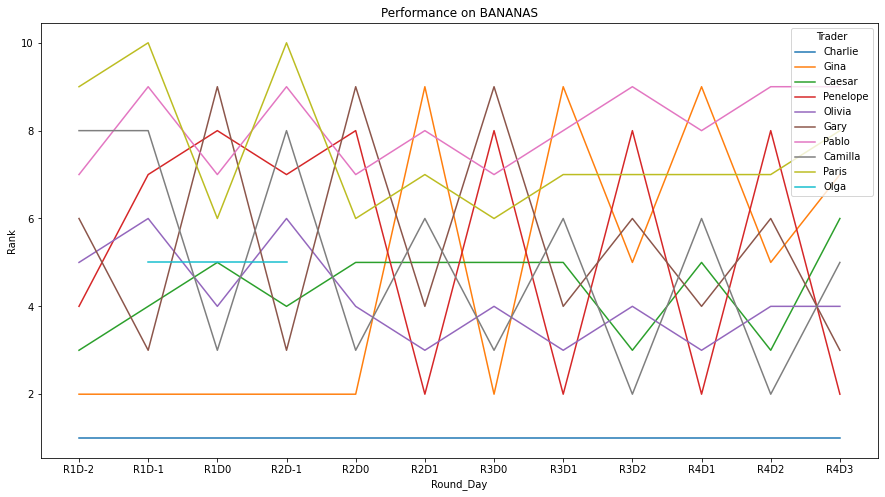

In [9]:
banana_performance = get_product_performance("BANANAS")
plot_performance(banana_performance, "BANANAS")

max position: %d 262
min position: %d -200
------------------
max position: %d 399
min position: %d -32
------------------
max position: %d 472
min position: %d -30
------------------
max position: %d 262
min position: %d -200
------------------
max position: %d 472
min position: %d -30
------------------
max position: %d 405
min position: %d -35
------------------
max position: %d 480
min position: %d -63
------------------
max position: %d 472
min position: %d -30
------------------
max position: %d 405
min position: %d -35
------------------
max position: %d 480
min position: %d -63
------------------
max position: %d 399
min position: %d -75
------------------
max position: %d 405
min position: %d -35
------------------


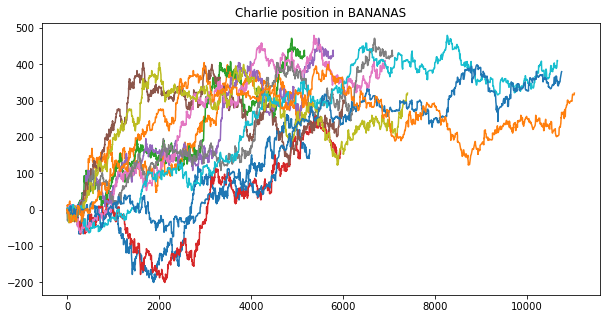

In [10]:
for data in data_ls:
    track_position(data, "BANANAS", "Charlie")

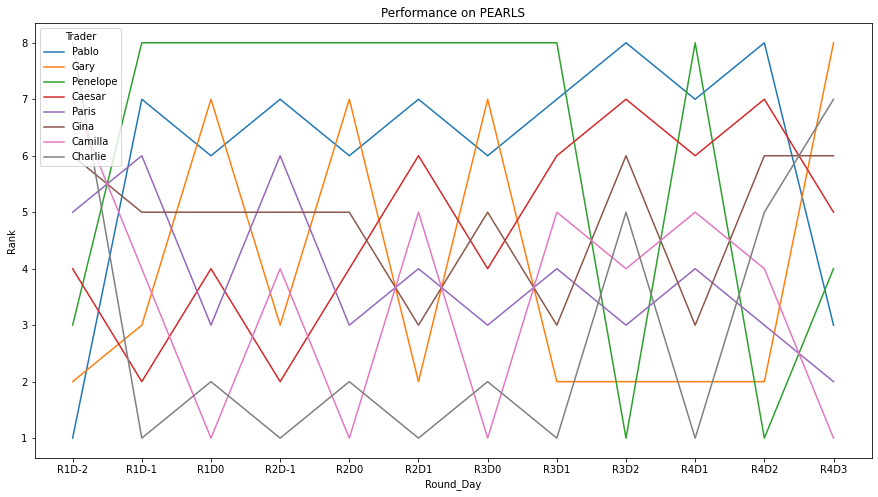

In [11]:
pearls_performance = get_product_performance("PEARLS")
plot_performance(pearls_performance, "PEARLS")

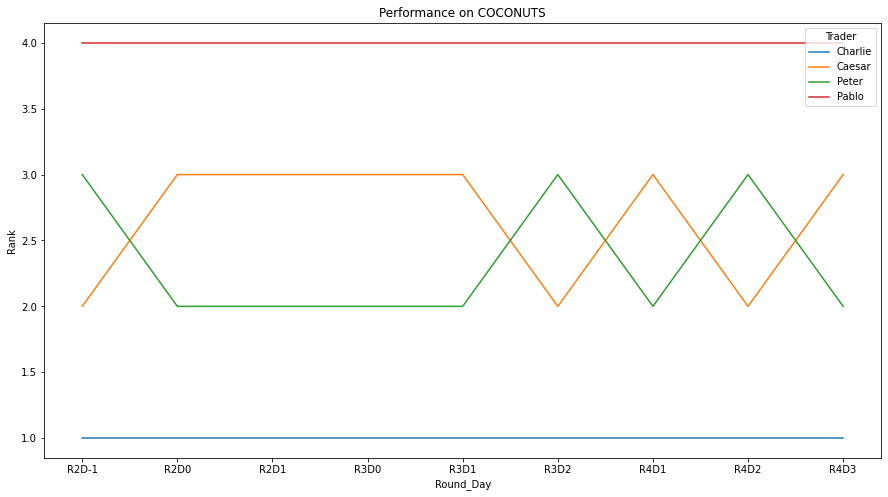

In [12]:
coconuts_performance = get_product_performance("COCONUTS")
plot_performance(coconuts_performance, "COCONUTS")

No relevant transactions
No relevant transactions
No relevant transactions
max position: %d 1295
min position: %d 30
------------------
max position: %d 806
min position: %d 12
------------------
max position: %d 956
min position: %d -6
------------------
max position: %d 1256
min position: %d -20
------------------
max position: %d 806
min position: %d 12
------------------
max position: %d 956
min position: %d -6
------------------
max position: %d 1256
min position: %d -20
------------------
max position: %d 1512
min position: %d 3
------------------
max position: %d 956
min position: %d -6
------------------


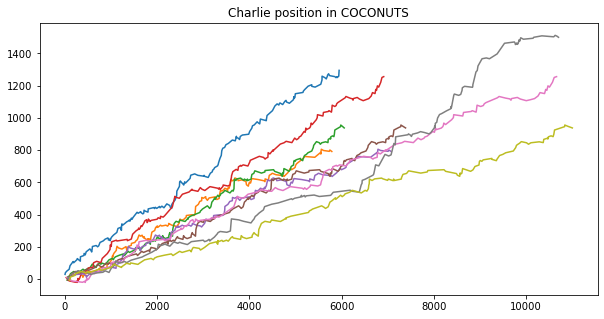

In [13]:
for data in data_ls:
    track_position(data, "COCONUTS", "Charlie")

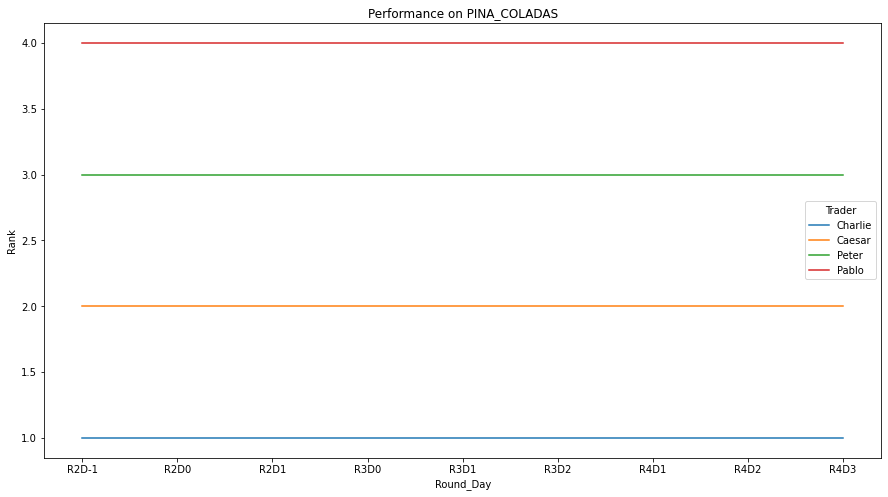

In [14]:
pina_performance = get_product_performance("PINA_COLADAS")
plot_performance(pina_performance, "PINA_COLADAS")

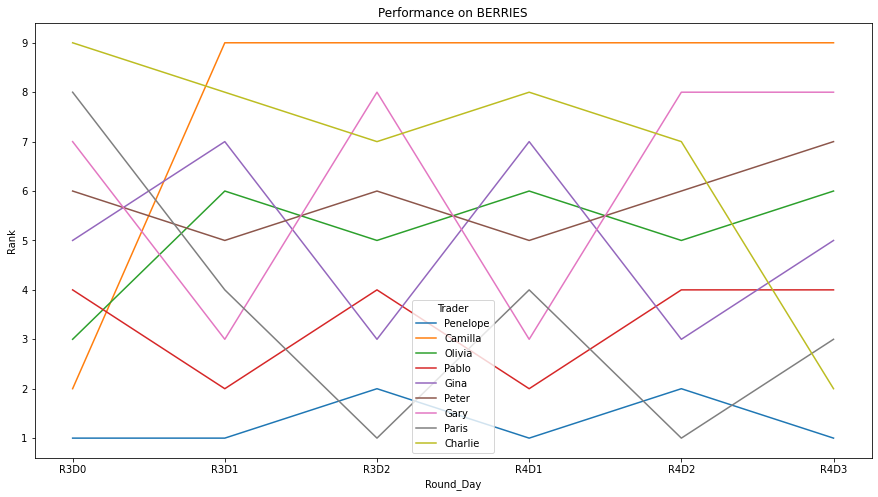

In [15]:
berries_performance = get_product_performance("BERRIES")
plot_performance(berries_performance, "BERRIES")

No relevant transactions
No relevant transactions
No relevant transactions
No relevant transactions
No relevant transactions
No relevant transactions
max position: %d 76
min position: %d -161
------------------
max position: %d 175
min position: %d -67
------------------
max position: %d 203
min position: %d -37
------------------
max position: %d 76
min position: %d -161
------------------
max position: %d 192
min position: %d -61
------------------
max position: %d 203
min position: %d -37
------------------


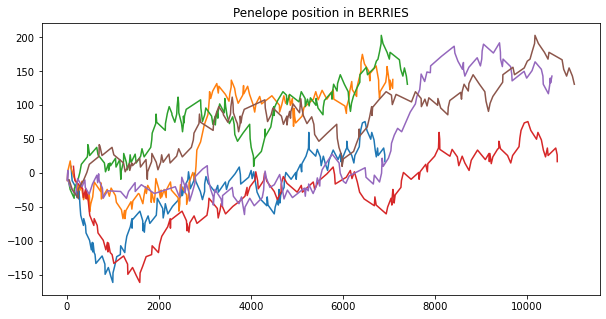

In [16]:
for data in data_ls:
    track_position(data, "BERRIES", "Penelope")

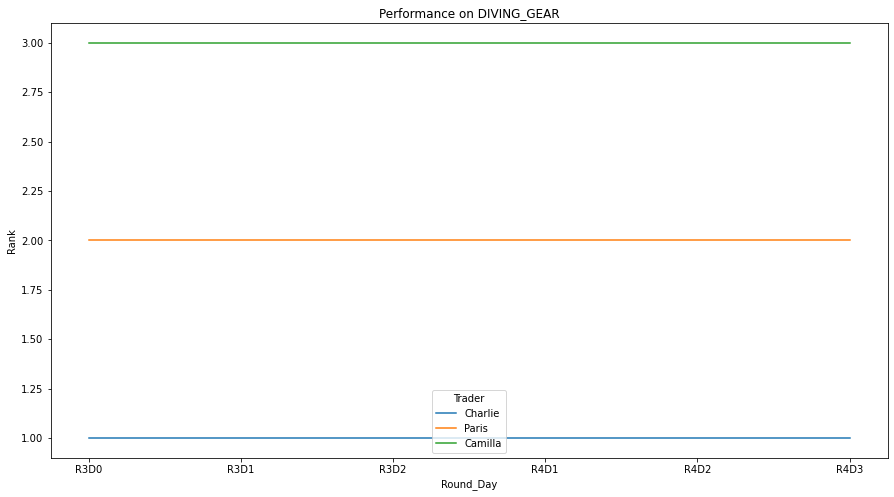

In [17]:
diving_gear_performance = get_product_performance("DIVING_GEAR")
plot_performance(diving_gear_performance, "DIVING_GEAR")

No relevant transactions
No relevant transactions
No relevant transactions
No relevant transactions
No relevant transactions
No relevant transactions
max position: %d 78
min position: %d -2
------------------
max position: %d 163
min position: %d -5
------------------
max position: %d 157
min position: %d -7
------------------
max position: %d 78
min position: %d -2
------------------
max position: %d 157
min position: %d -13
------------------
max position: %d 157
min position: %d -7
------------------


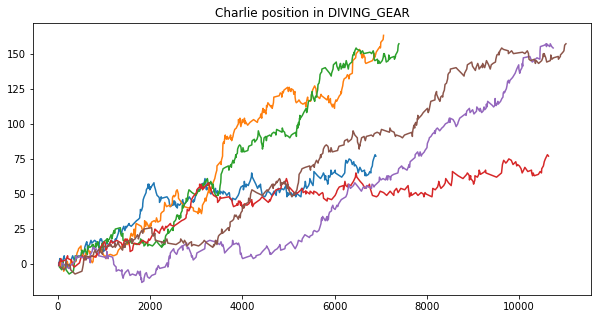

In [18]:
for data in data_ls:
    track_position(data, "DIVING_GEAR", "Charlie")

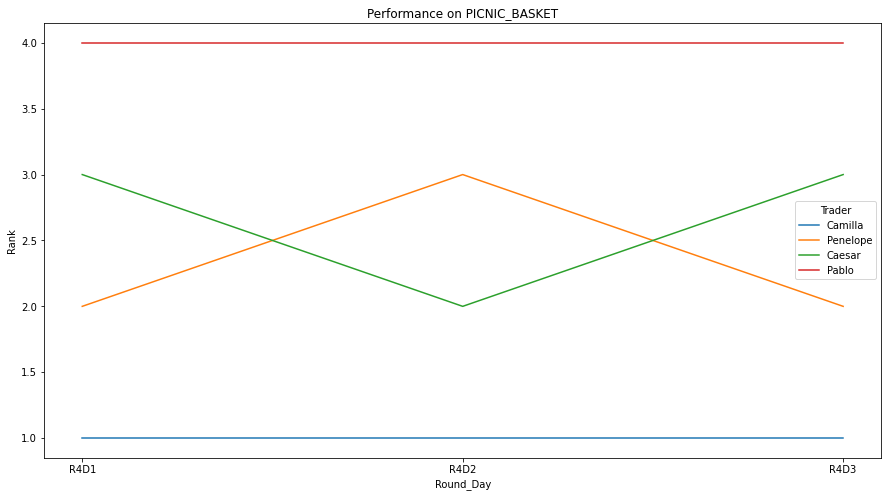

In [19]:
pinic_performance = get_product_performance("PICNIC_BASKET")
plot_performance(pinic_performance, "PICNIC_BASKET")

No relevant transactions
No relevant transactions
No relevant transactions
No relevant transactions
No relevant transactions
No relevant transactions
No relevant transactions
No relevant transactions
No relevant transactions
max position: %d 205
min position: %d -34
------------------
max position: %d 150
min position: %d -20
------------------
max position: %d 204
min position: %d -4
------------------


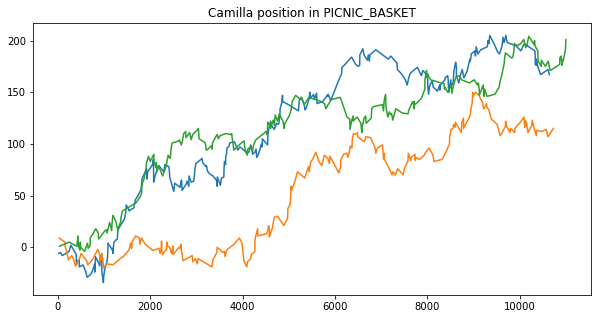

In [20]:
for data in data_ls:
    track_position(data, "PICNIC_BASKET", "Camilla")

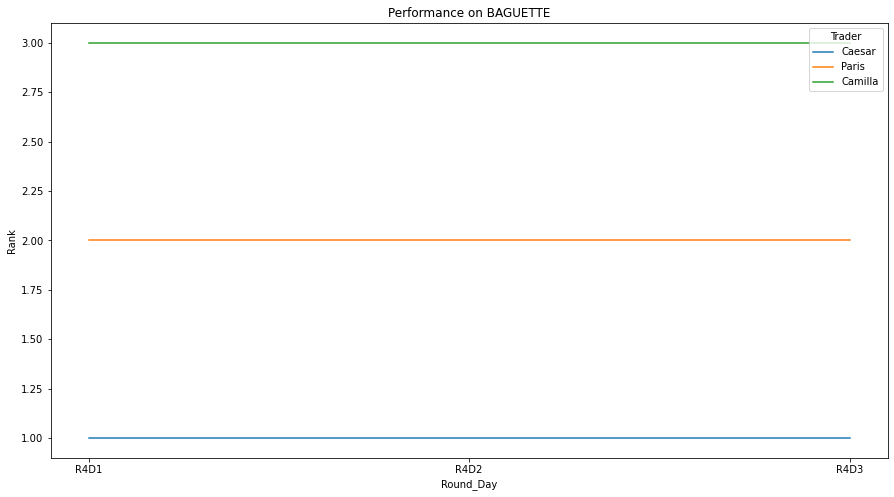

In [21]:
baguette_performance = get_product_performance("BAGUETTE")
plot_performance(baguette_performance, "BAGUETTE")

No relevant transactions
No relevant transactions
No relevant transactions
No relevant transactions
No relevant transactions
No relevant transactions
No relevant transactions
No relevant transactions
No relevant transactions
max position: %d 1272
min position: %d -3
------------------
max position: %d 1253
min position: %d -12
------------------
max position: %d 1515
min position: %d 4
------------------


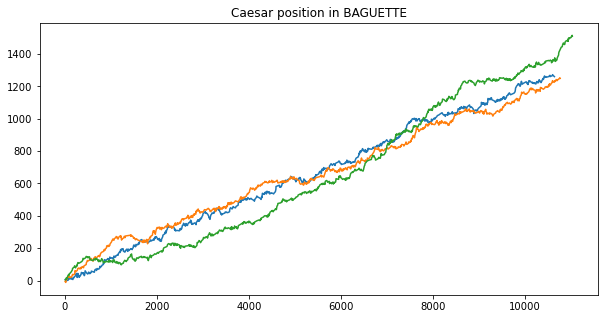

In [22]:
for data in data_ls:
    track_position(data, "BAGUETTE", "Caesar")

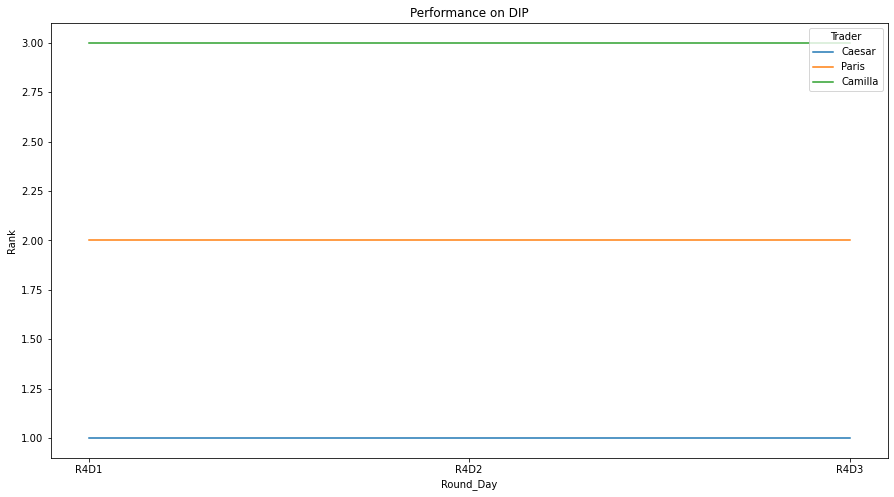

In [23]:
dip_performance = get_product_performance("DIP")
plot_performance(dip_performance, "DIP")

No relevant transactions
No relevant transactions
No relevant transactions
No relevant transactions
No relevant transactions
No relevant transactions
No relevant transactions
No relevant transactions
No relevant transactions
max position: %d 2441
min position: %d -11
------------------
max position: %d 2396
min position: %d -22
------------------
max position: %d 2611
min position: %d 6
------------------


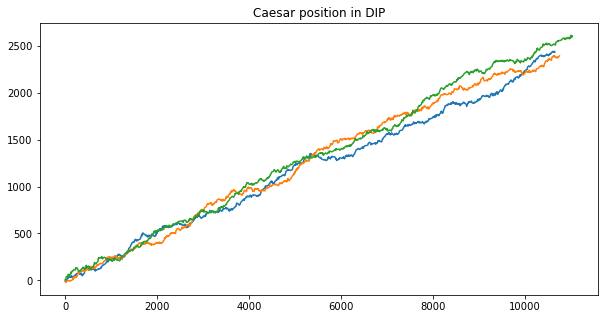

In [24]:
for data in data_ls:
    track_position(data, "DIP", "Caesar")

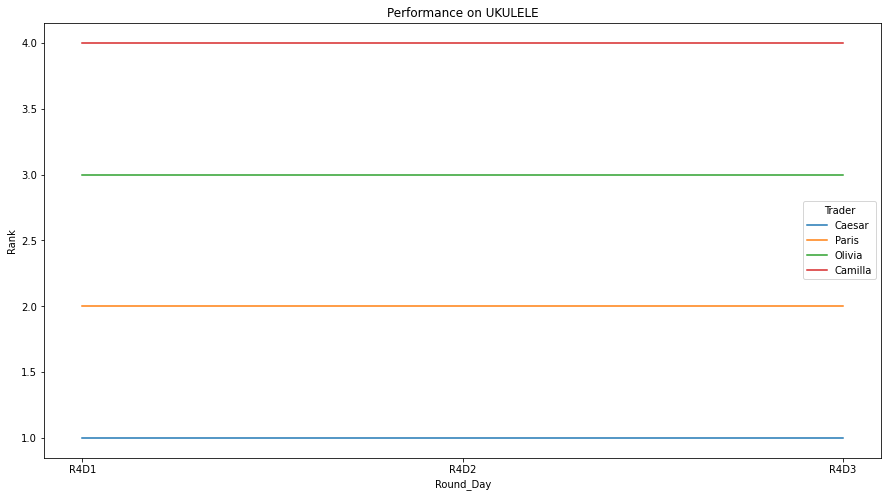

In [25]:
ukulele_performance = get_product_performance("UKULELE")
plot_performance(ukulele_performance, "UKULELE")

No relevant transactions
No relevant transactions
No relevant transactions
No relevant transactions
No relevant transactions
No relevant transactions
No relevant transactions
No relevant transactions
No relevant transactions
max position: %d 556
min position: %d -3
------------------
max position: %d 568
min position: %d -16
------------------
max position: %d 680
min position: %d -7
------------------


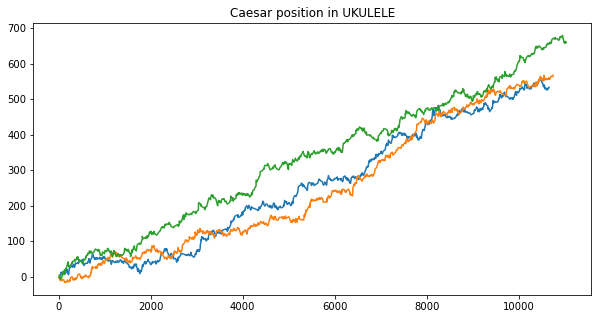

In [26]:
for data in data_ls:
    track_position(data, "UKULELE", "Caesar")